In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [7]:
info = pd.read_csv("../csvs/random_summary.csv", index_col=0)
info = info[(info['Mean'] < 7) & (info['Mean'] > 4)]
info.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
0,1,5.501436e+05,5.480027,0.347572,0.685497,593.820388,926.447883
1,1007,6.866933e+05,5.589877,0.459087,0.061534,NaN,NaN
2,1021,5.912132e+05,6.003697,0.330846,0.828219,760.306801,777.598225
3,1025,1.185226e+07,5.799719,0.386725,0.061534,NaN,NaN
4,1041,1.136642e+05,5.725149,0.489056,0.003763,11366.432725,9.999991


In [8]:
ranked_scores = info.sort_values("KSpval", ascending=False)
ranked_scores.head()

,ID,instability_time,Mean,Sigma,KSpval,tlyap10,Nlyap10
155,2083,488774.675888,5.548889,0.433387,0.980263,NaN,NaN
98,1810,259477.123657,5.986249,0.628096,0.968280,NaN,NaN
169,2126,294690.834524,5.314722,0.338908,0.954219,NaN,NaN
241,25,60203.689796,5.329840,0.335851,0.913689,589.716790,102.089157
201,2264,43554.927188,4.669551,0.301901,0.913689,109.979396,396.028062


In [9]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/random_distributions/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Sys_2083_1000.csv', 'Sys_1810_1000.csv', 'Sys_2126_1000.csv', 'Sys_25_1000.csv', 'Sys_2264_1000.csv', 'Sys_2018_1000.csv']


/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


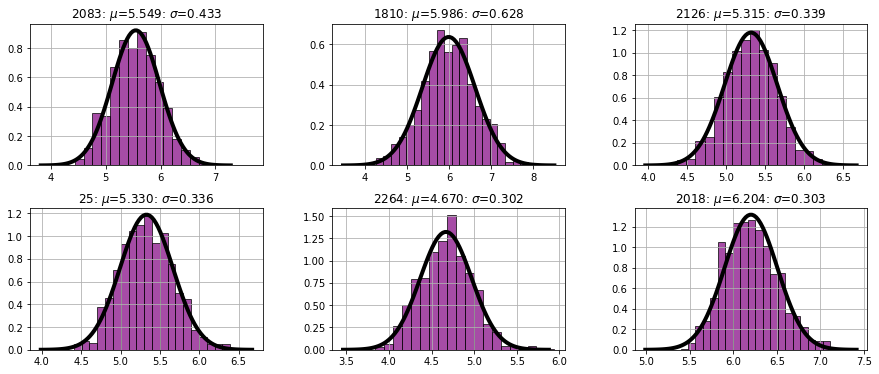

In [10]:
very_gaussian = ranked_scores.head(6)["ID"]
very_gaussian = ["Sys_{0}_1000.csv".format(int(x))  for x in very_gaussian]
print (very_gaussian)
plot_random_hists(very_gaussian)